# Segnali nel dominio della frequenza: la teoria di Fourier
## DFT (Discrete Fourier Trasform) & STFT (Short Time Fourier Trasform)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import librosa
import soundfile as sf

style.use("dark_background")

"*...una funzione periodica a tempo continuo $v(t)$ di periodo $T$ e frequenza fondamentale $f_0 = \frac{1}{T}$ può essere scomposta in una sommatoria infinita di un termine costante $a_0$ (valore medio della funzione in un periodo) e di infinite sinusoidi (armoniche) di frequenza multipla della fondamentale; l'ampiezza delle armoniche è decrescente e tendente a zero con il crescere della frequenza.<br> 
Allo stesso modo, ogni segnale T-periodico può essere ottenuto come sovrapposizione di infiniti segnali trigonometrici, ognuno dei quali associato ad una frequenza multipla della frequenza fondamentale.*"<br>
<div align="right">J. B. J. Fourier (1882)</div>
<br></br>

<div align="center">
    $v(t) = a_0+\sum\limits_{k=1}^{\infty}A_{k}·\sin(k\omega_{0}t + \phi_{k})$
    </div>

### trasformata ed antitrasformata discreta di Fourier (DFT ed IDFT)
*la trasformata di fourier FT è un operatore matematico che applicato ad un segnale nel dominio del tempo ne individua un altro nel dominio della frequenza*.<br><br>
<div align="center">
    $X(f) = \int\limits_{-\infty}^{+\infty}x(t)\;e^{-i2\pi ft}dt \qquad x(t) = \int\limits_{-\infty}^{+\infty}X(f)\;e^{i2\pi ft}df$
    </div>
<br><br>
...l'equivalente della FT per l'elaborazione dei segnali digitali, campionati, è la DFT (Discrete Fourier Trasform)<br><br>

<div align="center">
    $DFT\;X[k] = \sum\limits_{n=0}^{N - 1}x(t)\;e^{\frac{-i2\pi nk}{N}} \qquad IDFT\;x[n] = \sum\limits_{k=0}^{N - 1}X[k]\;e^{\frac{-i2\pi nk}{N}}$
    </div>
$e^{ix} = \cos{x} +i\;\sin{x}$<br>
$i = \sqrt{-1}$<br>
$X[f] = \;vettore\;frequenze\;o\;dominio\;trasformato$<br>
$x[n] = \;vettore\;tempo$<br>
<br>
<div align="center">
    $X[k] = \sum\limits_{n=0}^{N - 1}x(t)\;\cos{(\frac{2\pi nk}{N})} - i\;\sin{(\frac{2\pi nk}{N})} \qquad x[n] = \sum\limits_{k=0}^{N - 1}X(k)\;\cos{(\frac{2\pi nk}{N})} + i\;\sin{(\frac{2\pi nk}{N})}$
    </div>
<br>
...dunque, una funzione periodica $f(t)$ può essere rappresentata come:<br>
<br>
<div align="center">
    $f(t) = \frac{a_0}{2}+\sum\limits_{n=1}^{N}a_{n}\cos{(2\pi nt)} + b_{n}\sin{(2\pi nt)}$
    </div>
$a_0,\;a_n,\;b_n = \; coefficienti\;di\;fourier$<br>
<br>
$a_0 = \frac{1}{\pi}\sum\limits_{n=0}^{N-1}x[n]$<br><br>
$a_n = \frac{1}{\pi}\sum\limits_{n=0}^{N-1}x[n]\cos{(\frac{2\pi nt}{N})}$<br><br>
$b_n = \frac{1}{\pi}\sum\limits_{n=0}^{N-1}x[n]\sin{(\frac{2\pi nt}{N})}$<br><br>

In [2]:
N = 32
t = np.arange(N)
sig1 = np.sin(2 * np.pi * t/N)
sig2 = np.sin(3 * 2 * np.pi * t/N)
xn = sig1 + sig2
xn

array([ 0.00000000e+00,  7.50660555e-01,  1.30656296e+00,  1.53635551e+00,
        1.41421356e+00,  1.02655993e+00,  5.41196100e-01,  1.49315668e-01,
        0.00000000e+00,  1.49315668e-01,  5.41196100e-01,  1.02655993e+00,
        1.41421356e+00,  1.53635551e+00,  1.30656296e+00,  7.50660555e-01,
        4.89858720e-16, -7.50660555e-01, -1.30656296e+00, -1.53635551e+00,
       -1.41421356e+00, -1.02655993e+00, -5.41196100e-01, -1.49315668e-01,
        0.00000000e+00, -1.49315668e-01, -5.41196100e-01, -1.02655993e+00,
       -1.41421356e+00, -1.53635551e+00, -1.30656296e+00, -7.50660555e-01])

In [3]:
# DFT metodo 1
def dft1(x):
    N = len(x)
    Xf = []
    for k in range(N):
        real, imag = 0, 0
        for n in range(N):
            real += x[n] * np.cos(2 * np.pi * n * k/N)
            imag -= x[n] * np.sin(2 * np.pi * n * k/N)
        value = real + 1j * imag
        Xf.append(value)
    Xf = np.array(Xf, dtype=complex)
    return(Xf)

In [4]:
dft1(xn)

array([ 3.66373598e-15+0.00000000e+00j,  4.44089210e-16-1.60000000e+01j,
       -2.66453526e-15-2.77555756e-16j,  5.21804822e-15-1.60000000e+01j,
        2.66453526e-15+4.44089210e-16j, -3.16413562e-15+0.00000000e+00j,
        1.03805853e-14+1.49880108e-14j,  1.91513472e-15-7.32747196e-15j,
        5.20083744e-15+3.10862447e-15j,  6.10622664e-16+2.10942375e-15j,
        4.71844785e-15+4.66293670e-15j, -7.16093851e-15+3.11972670e-14j,
       -1.29896094e-14-1.13242749e-14j,  1.22124533e-15-2.99760217e-15j,
        4.66293670e-15-1.05471187e-15j,  1.31006317e-14+1.25455202e-14j,
       -4.44089210e-16-9.35203697e-15j,  2.52020627e-14-1.77635684e-14j,
        8.88178420e-15-8.16013923e-15j,  2.39808173e-14-7.71605002e-15j,
        1.87627691e-14+1.07691633e-14j,  1.39332990e-14+2.85327317e-14j,
       -4.60742555e-15-9.10382880e-15j, -2.93931546e-14+4.62963001e-14j,
       -4.50497559e-15+4.48530102e-14j,  2.82829316e-14-3.57491814e-14j,
       -1.19348975e-14+3.86357613e-14j,  7.60502772

lo si rappresenta con $N$ campioni complessi, ovvero, $N$ numeri complessi... ove per numero complesso $c = (a + ib)\;con\;a = Re\;e\;\sqrt{-1}·b = Im$, si intende una coppia di valori, uno reale ed uno immaginario che è possibile visualizzare nel piano *complesso di Gauss*, l'asse $x$ per la parte reale Re e l'asse $y$ per la parte immaginaria Im.<br>
Con un campione complesso, dunque, rappresentiamo il nostro vettore $\overrightarrow{v}$<br>
<br><br>
$\overrightarrow{v} = a+ib$<br>
<br>
con modulo:<br>
$||\overrightarrow{v}|| = \sqrt{a^{2} + b^{2}}$<br>
<br>
e, fase:<br>
$\theta = \tan^{-1}{(\frac{b}{a})}$<br>


In [5]:
# DFT metodo 1 con mag e fase
def dft1b(x):
    N = len(x)
    Xf = {}
    sig, mag, phase = [], [], []
    for k in range(N):
        real, imag = 0, 0
        for n in range(N):
            real += x[n] * np.cos(2 * np.pi * n * k/N)
            imag -= x[n] * np.sin(2 * np.pi * n * k/N)
        sig.append(real + 1j * imag)
        mag.append(np.sqrt(real**2 + imag**2))
        phase.append(np.arctan2(imag, real))
    Xf["signal"] = sig
    Xf["mag"] = mag
    Xf["phase"] = phase
    return(Xf)

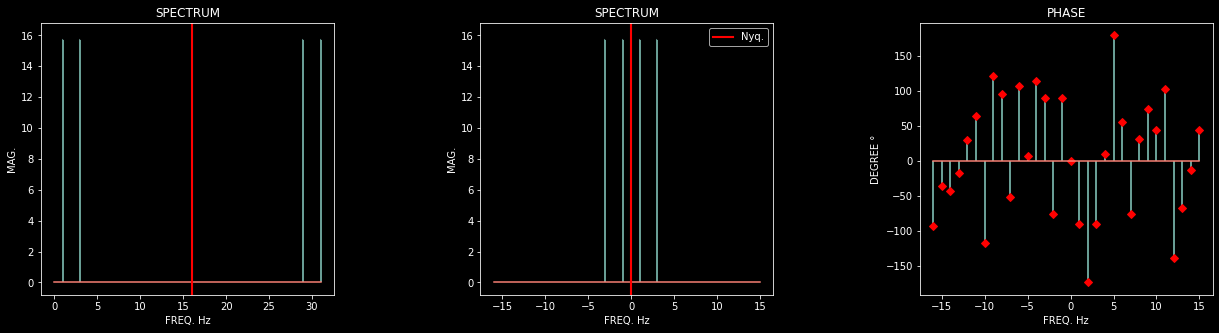

In [6]:
s1 = dft1b(xn)

fig, ax = plt.subplots(1, 3, figsize=(21, 5))

# spectrum
ax[0].set_title("SPECTRUM")
ax[0].stem(s1["mag"], markerfmt='kD')
ax[0].axvline(N//2, linewidth=2.1, color='r')
ax[0].set_xlabel("FREQ. Hz")
ax[0].set_ylabel("MAG.")

x_freq = [x if(x < N//2) else x-N for x in range(N)]
ax[1].set_title("SPECTRUM")
ax[1].stem(x_freq, s1["mag"], markerfmt='kD')
ax[1].axvline(0, linewidth=2.1, color='r', label="Nyq.")
ax[1].set_xlabel("FREQ. Hz")
ax[1].set_ylabel("MAG.")
ax[1].legend()

# phase
ax[2].set_title("PHASE")
s1_gradi = list(map(lambda x: x*180/np.pi, s1["phase"]))
ax[2].stem(x_freq, s1_gradi, markerfmt='rD')
ax[2].set_xlabel("FREQ. Hz")
ax[2].set_ylabel("DEGREE °")

plt.subplots_adjust(wspace=0.5)
plt.show()

nel dominio trasformato, le frequenze $[0\leq k \leq \frac{N}{2} - 1]$ corrispondono alle frequenze positive, mentre $[\frac{N}{2} \leq k \leq N-1]$ a quelle negative. La frequenza di Nyquist corrisponde al valore all'indice $\frac{N}{2}$ se $N$ è pari.<br><br>
**LA TRASFORMATA DI FOURIER DISCRETA DI UNA SEQUENZA DI N VALORI COMPLESSI RESTITUISCE UN'ALTRA SEQUENZA DI UGUALE LUNGHEZZA ED ALTERNATIVA RAPPRESENTAZIONE NEL DOMINIO DELLE FREQUENZE**

detto ciò, potremmo pensare la DFT anche come semplice prodotto tra matrici!<br>
<br><br>
<div align='center'>
    $X[k] = \sum\limits_{n=0}^{N - 1}x[t]\;e^{\frac{-i2\pi nk}{N}} = \sum\limits_{n=0}^{N - 1}x[t]\;W_{N}^{-nk}$
    </div>
con:<br>
$W_N = e^{\frac{-i2\pi}{N}}$
<br><br>
e, dunque:<br>
<div align='center'>
    $
    \begin{bmatrix}
    X_1\\X_2\\X_3\\\vdots 
    \\X_{N-1}
    \end{bmatrix}
    = \begin{bmatrix}
    1&1&1&\dots&1\\  
    1&W_{N}&W_{N}^{2}&\dots&W_{N}^{N-1}\\
    1&W_{N}^{2}&W_{N}^{4}&\dots&W_{N}^{2(N-1)}\\
    1&W_{N}^{3}&W_{N}^{6}&\dots&W_{N}^{3(N-1)}\\
    \vdots&\vdots&\vdots&\vdots&\vdots\\
    1&W_{N}^{N-1}&W_{N}^{2(N - 1)}&\dots&W_{N}^{(N-1)^{2}}\\
    \end{bmatrix}
    ·
    \begin{bmatrix}
    x_1\\x_2\\x_3\\\vdots 
    \\x_{N-1}
    \end{bmatrix}
    $
    </div>

In [7]:
# dft metodo 2 (prodotto tra matrici) O(n^2)
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N) # tempo
    k = np.reshape(n, (N, 1)) # frequenze
    wn = np.exp(-2j * np.pi * n * k/N)
    ft = np.dot(wn, x)
    return(ft)

In [8]:
s2 = DFT(xn)
s2

array([ 3.66373598e-15+0.00000000e+00j,  4.44089210e-16-1.60000000e+01j,
       -2.66453526e-15-2.77555756e-16j,  5.21804822e-15-1.60000000e+01j,
        2.66453526e-15+4.44089210e-16j, -3.16413562e-15+0.00000000e+00j,
        1.03805853e-14+1.49880108e-14j,  1.91513472e-15-7.32747196e-15j,
        5.20083744e-15+3.10862447e-15j,  6.10622664e-16+2.10942375e-15j,
        4.71844785e-15+4.66293670e-15j, -7.16093851e-15+3.11972670e-14j,
       -1.29896094e-14-1.13242749e-14j,  1.22124533e-15-2.99760217e-15j,
        4.66293670e-15-1.05471187e-15j,  1.31006317e-14+1.25455202e-14j,
       -4.44089210e-16-9.35203697e-15j,  2.52020627e-14-1.77635684e-14j,
        8.88178420e-15-8.16013923e-15j,  2.39808173e-14-7.71605002e-15j,
        1.87627691e-14+1.07691633e-14j,  1.39332990e-14+2.85327317e-14j,
       -4.60742555e-15-9.10382880e-15j, -2.93931546e-14+4.62963001e-14j,
       -4.50497559e-15+4.48530102e-14j,  2.82829316e-14-3.57491814e-14j,
       -1.19348975e-14+3.86357613e-14j,  7.60502772

e, essendo un prodotto tra matrici, il costo computazionale sarà $O(n^2)$<br>
Se ipotizziamo un segnale di durata $60\;secondi$ campionato a $sr = 44100$, allora $N = 60·44100\;samples$... che equivale ad un numero di operazioni pari a: $(60·44100)^2 = 7001316000000$!!!<br>
<br>
in altre parole, considerando $10^8$ operazioni al secondo consentite:<br>
<br>
$\sqrt{10^8} = 10000 \;max\;sample\;al\;secondo$<br>
<br>
il tempo impiegato ad elaborare sarà...<br>
$\frac{(2646000)^2}{10000^2} \approx 70013s\;o\;19h$

In [9]:
%%time
durata_in_secondi = 1
sample_rate = 8810
segnale_prova = np.sin(2 * np.pi * np.arange(durata_in_secondi * sample_rate)/sample_rate)
prova_dft = DFT(segnale_prova)

CPU times: user 1.95 s, sys: 2.11 s, total: 4.06 s
Wall time: 2.5 s


## Trasformata veloce di Fourier (FFT)
una soluzione al grande problema dell'eccessivo carico computazionale arriva grazie a J. Cooley e J. Tukey che propongono un algoritmo per la semplificazione dei calcoli: *decomporre il problema, una DFT di lunghezza N, in piccoli sottoproblemi*.<br>
Alla base, il lemma di Danielson-Lanczos: *una trasformata di Fourier discreta di lunghezza N può essere riscritta come la somma di due trasformate di Fourier discrete di lunghezza N/2, una formata dai termini ad indice pari e una formata dai termini ad indice dispari*.<br><br>
<div align='center'>
    $X[k] = \sum\limits_{n=0}^{N - 1}x[n]W_{N}^{-nk}$<br><br>
    $= \sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n]e^{-\frac{i2\pi (2n)k}{N}} + \sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n + 1]e^{-\frac{i2\pi (2n + 1)k}{N}}$<br><br>
     $= \sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n]e^{-\frac{i2\pi nk}{N/2}} + \sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n + 1]e^{-\frac{i2\pi nk}{N/2}·\frac{i\pi k}{N/2}}$<br><br>
    $= \sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n]e^{-\frac{i2\pi nk}{N/2}} + C_k\sum\limits_{n=0}^{\frac{N}{2} - 1}x[2n + 1]e^{-\frac{i2\pi nk}{N/2}}$<br><br>
    </div>

con il termine $C_k = e^{-\frac{i2\pi k}{N}}$

certo... se tutto restasse così non avremmo risolto tanto: sarebbero due DFT di lunghezza dimezzata. Se, però, consideriamo di iterare il procedimento fino ad arrivare ad un numero N di DFT unitarie, il gioco è fatto! Ad una DFT unitaria corrisponde copiare l'input in output e, tutto si riduce ad una combinazione lineare degli input pesati dal termine $C_k$.<br><br>
in questo modo, riusciamo a passare, in termini computazionali, da $O(n^2)$ a $O(n \log{n})$<br><br>
riprendiamo l'esempio precedente: $N = 60·44100$<br><br>
DFT $O(n^2) = \frac{(2646000)^2}{10^8} \approx 70013s\;o\;19h$ per per 7001316000000 operazioni<br><br>
FFT $O(n\log{n}) = \frac{2646000\log{(2646000)}}{10^8} \approx 0.39s$ per ca. 39130528 operazioni<br><br>

In [10]:
# l'algoritmo di FFT richiede che il numero di campioni sia potenza di 2

def FFT1(x):
    N, L = len(x), len(x)//2
    if(N == 1):
        return(x)
    
    even = x[::2]
    odd = x[1::2]
    Xe = FFT1(even) # pari
    Xo = FFT1(odd) # dispari
    
    X = np.zeros(N, dtype=complex)
    for k in range(L):
        Wn = np.exp(-2j * np.pi * k/N)
        c = Wn * Xo[k]
        X[k] = Xe[k] + c
        X[k + L] = Xe[k] - c
    return(X)

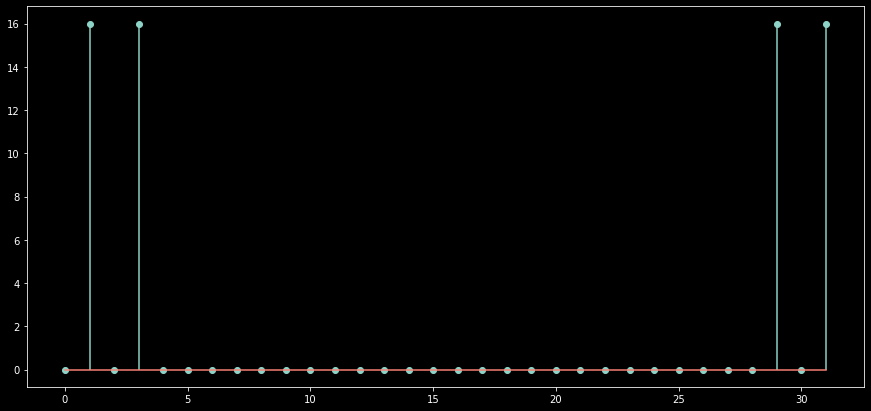

CPU times: user 157 ms, sys: 415 ms, total: 572 ms
Wall time: 108 ms


In [11]:
%%time
fft = FFT1(xn)
plt.figure(figsize=(15, 7))
plt.stem(np.abs(fft))
plt.show()

In [12]:
# FFT scrittura compatta
def FFT(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    assert np.log2(N) == int(np.log2(N)), "N deve essere potenza di 2"
    
    if(N == 1):
        return(x)
    
    even = FFT(x[::2])
    odd = FFT(x[1::2])
    Wn = np.exp(-2j * np.pi * np.arange(N)/N)
    x1 = even + Wn[:N//2] * odd
    x2 = even + Wn[N//2:] * odd
    X = [*x1, *x2]
    return(X)

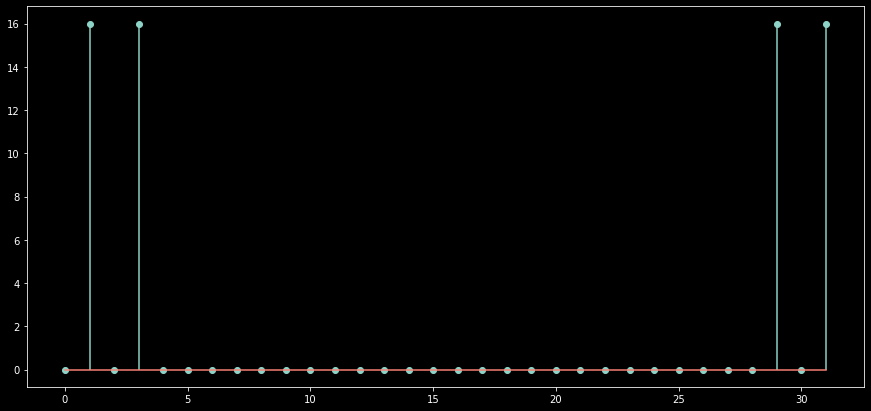

CPU times: user 260 ms, sys: 271 ms, total: 530 ms
Wall time: 146 ms


In [13]:
%%time
fft = FFT(xn)
plt.figure(figsize=(15, 7))
plt.stem(np.abs(fft))
plt.show()

#### confrontiamo i tempi di esecuzione

In [14]:
x_test = np.random.random(4096)
print("runtine DFT:", end="")
%timeit DFT(x_test)
print("runtine FFT:", end="")
%timeit FFT(x_test)


runtine DFT:516 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
runtine FFT:80.2 ms ± 888 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


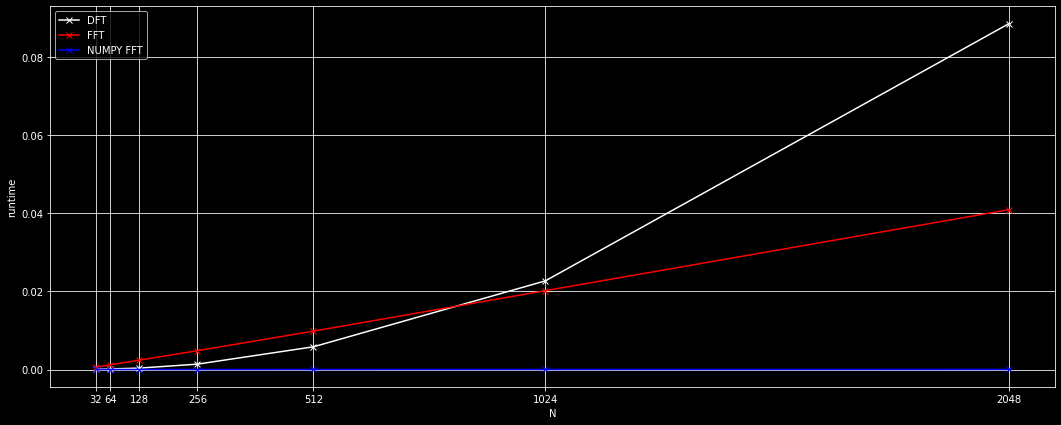

In [15]:
import timeit
samples = [2**n for n in range(5, 12)]
runtime_dft, runtime_fft, runtime_np = [], [], []
esecuzioni = 10

for value in samples:
    xt = np.arange(value)
    sig_test = np.sin(2 * np.pi * xt/value)
    _dft = timeit.timeit(lambda: DFT(sig_test), number=esecuzioni)/esecuzioni
    _fft = timeit.timeit(lambda: FFT(sig_test), number=esecuzioni)/esecuzioni
    _np = timeit.timeit(lambda: np.fft.fft(sig_test), number=esecuzioni)/esecuzioni
    runtime_dft.append(_dft)
    runtime_fft.append(_fft)
    runtime_np.append(_np)

plt.figure(figsize=(18, 7))
plt.plot(samples, runtime_dft, '-xw', label="DFT")
plt.plot(samples, runtime_fft, '-xr', label="FFT")
plt.plot(samples, runtime_np, '-xb', label="NUMPY FFT")
plt.xlabel("N")
plt.ylabel("runtime")
plt.xticks(samples)
plt.grid()
plt.legend()
plt.show()

## Short Time Fourier Trasform (STFT & ISTFT)

la DFT fornisce una misura del peso delle diverse frequenze in un segnale periodico. In natura, però, è molto difficile trovare segnali periodici. Per catturare le variazioni spettrali tempo-dipendenti di un segnale è necessario un campionamento ad intervalli regolari, analizzare di volta in volta brevi finestre di campioni in cui si ipotizza che il segnale possa essere periodico: per intenderci, tante piccole DFT.<br>
Tale procedura prende il nome di *Short Time Fourier Trasform* o *STFT*.<br><br>
<div align='center'>
    $X[m, k] = \sum\limits_{n=0}^{N-1}x[n]w[n - mR]e^{-\frac{i2\pi nk}{N}} \qquad x[n] = \frac{1}{N}\sum\limits_{k=0}^{N-1}X[m, k]e^{\frac{i2\pi nk}{N}}$
    </div>
$x[n] =\;segnale\;al\;tempo\;n$<br>
$w[n] =\;finestra\;di\;analisi\;n$<br>
$X[m, k] =\;DFT\;della\;finestra\;temporale\;analizzata$<br>
$R =\;hop\;size$<br><br>

si presenta, dunque, come una matrice $n \times m$, con $n$ righe pari alla lunghezza in campioni della finestra (*bins*) ed $m$ colonne (*frames*) pari alla lunghezza totale del segnale diviso $R$ (*fattore di salto*, definisce il tasso di campionamento della STFT). Tale fattore $R$ ci permette di sovrapporre le finestre di analisi (*overlap*), in modo tale da ridurre la perdita di informazioni (*frequency leakage*) dovuta dall'attenuazione agli estremi della finestra di analisi. Nota bene che, per assicurarsi una valida ricostruzione del segnale, deve valere:<br><br>
$$\sum\limits_{m=-\infty}^{\infty}w[n - mR] = 1$$<br>
**come si leggono i valori che una STFT restituisce?**<br>
ogni colonna della matrice conterrà le informazioni di magnitudo e fase di ciascuna componente analizzata (bin). Se ipotizziamo un segnale di $N = 16$ campioni ed una finestra $w$ di lunghezza $w_{length} = 4$, $R = 4$ ed $sr = 44100$, ciò che avremo, sarà una matrice di quattro righe ed altrettante colonne. In altre parole, è come se facessimo passare ogni frame attraverso un banco di quattro filtri passa-banda con frequenza centrale fissata a:<br><br>
$$f_{(centrale,\;bin)}=\frac{n}{w_{length}}·sr \qquad n = [0, 1, 2, 3, ..., w_{length} - 1]$$
<br><br>
è, allora, estremamente facile intuire che: **la definizione frequenziale è direttamente proporzionale al valore che assume $w_{length}$**, al crescere aumenta e, viceversa, diminuisce!

In [16]:
def STFT(x, w_size, hop_size, sample_rate):
    N = len(x)
    row = w_size
    col = int((N - w_size)/hop_size)
    stft = np.array(np.zeros((row//2, col)), dtype=complex)
    
    for c in range(col):
        m = hop_size * c
        frame = x[m:m + w_size]
        w_hamming = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(row)/(w_size - 1))
        frame *= w_hamming
        X = FFT(frame)
        stft[:, c] = X[:len(X)//2]
    
    freq = sample_rate * np.arange(row//2)/w_size # asse frequenze
    time = hop_size/sample_rate * np.arange(col)
    
    return(freq, time, stft)

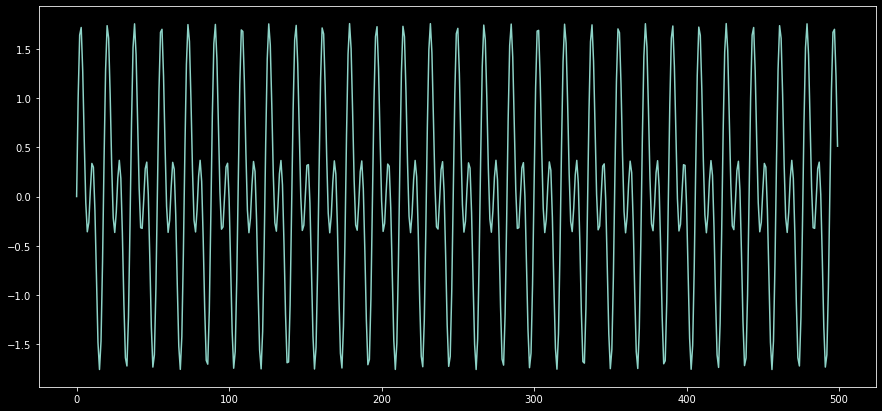

In [17]:
sample_rate = 44100
w_size = 2048
hop_size = 1024
segnale1 = np.sin(2 * np.pi * 2500 * np.arange(3 * sample_rate)/sample_rate)
segnale2 = np.sin(2 * np.pi * 5000 * np.arange(3 * sample_rate)/sample_rate)
segnale_stft = segnale1 + segnale2

plt.figure(figsize=(15, 7))
plt.plot(segnale_stft[:500])
plt.show()

In [18]:
%%time
f, t, X_stft = STFT(segnale_stft, w_size, hop_size, sample_rate)

CPU times: user 5.08 s, sys: 10.5 ms, total: 5.09 s
Wall time: 5.09 s


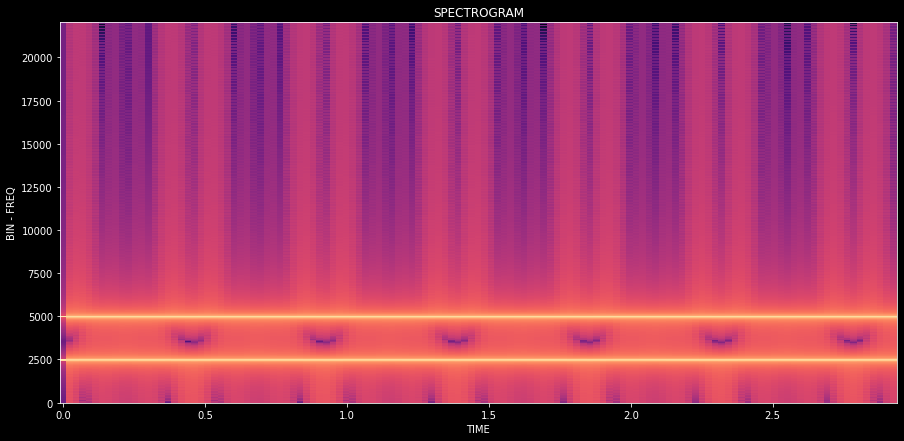

In [19]:
X_mag = np.log10(np.absolute(X_stft)**2)
plt.figure(figsize=(15, 7))
plt.pcolormesh(t, f, X_mag, cmap=plt.get_cmap("magma"), shading="auto")
plt.title("SPECTROGRAM")
plt.xlabel("TIME")
plt.ylabel("BIN - FREQ")
plt.show()

### ... recap

In [39]:
import math

def zeropad(x, wsize):
    n = len(x)
#     pot = math.ceil(math.log(n, 2))
#     N = 2**pot
#     z = [0] * ((N - n) + 1)
#     new_x = [*x, *z]
    
    N = (wsize * math.ceil(n/wsize)) + wsize
    z = [0] * N
    z[:n] = x 
    return(z)


def FFT(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    assert np.log2(N) == int(np.log2(N)), "N deve essere potenza di 2"
    
    if(N == 1):
        return(x)
    
    even = FFT(x[::2])
    odd = FFT(x[1::2])
    Wn = np.exp(-2j * np.pi * np.arange(N)/N)
    x1 = even + Wn[:N//2] * odd
    x2 = even + Wn[N//2:] * odd
    X = [*x1, *x2]
    return(X)


def STFFT(x, w_size, hop_size, sample_rate):
    
    sig = zeropad(x, w_size)
    N = len(sig)

    row = w_size
    col = int((N - w_size)/hop_size)
    stft = np.array(np.zeros((row, col)), dtype=complex)
    
    for c in range(col):
        m = hop_size * c
        frame = sig[m:m + w_size]
        w_hamming = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(w_size)/(w_size - 1))
        frame *= w_hamming
        X = FFT(frame)
        stft[:, c] = X
        
    return(stft)

def IFFT(X):
    N = len(X)
    L = N//2
    
    if(N <= 1):
        return(X)
    
    x = np.array(np.zeros(N), dtype=complex)
    
    Xe = IFFT(X[::2])
    Xo = IFFT(X[1::2])
    
    for i in range(L):
        W = np.exp(2j * np.pi * i/N)
        x[i] = Xe[i] + W * Xo[i]
        x[i+L] = Xe[i] - W * Xo[i]
    return(x)


def ISTFFT(X, hop_size):
    X = X.T
    N = (X.shape[0] * hop_size) + X.shape[1]
    x = np.array(np.zeros(N), dtype=float)
    h = 0
    for frame in X:
        f = IFFT(frame)/N
        x[h:h + X.shape[1]] += f.real + f.imag
        h += hop_size
    return(x)

In [32]:
file_sig, sr = librosa.load("cane.wav", sr=44100)

In [40]:
c = STFFT(file_sig, 4096, 512, 44100)

In [41]:
c_inv = ISTFFT(c, 512)

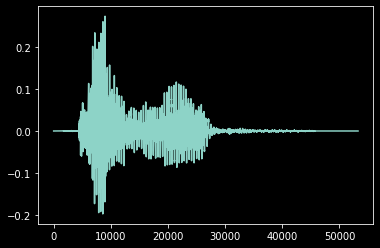

In [42]:
plt.plot(c_inv)
plt.show()

In [43]:
sf.write("pr.wav", c_inv, 44100, "PCM_24")

In [44]:
from IPython.display import Audio

In [45]:
Audio("pr.wav")